# ARIMA

In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
data = pd.read_csv('AEP_hourly.csv', index_col=0)
data.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [9]:
data.index = pd.to_datetime(data.index)
data = data['AEP_MW'].resample('W').mean()
data.dropna(inplace=True)
data = data['2012':]
data.shape

(345,)

In [10]:
data.head(3)

Datetime
2012-01-01    15335.297619
2012-01-08    17105.244048
2012-01-15    17500.880952
Freq: W-SUN, Name: AEP_MW, dtype: float64

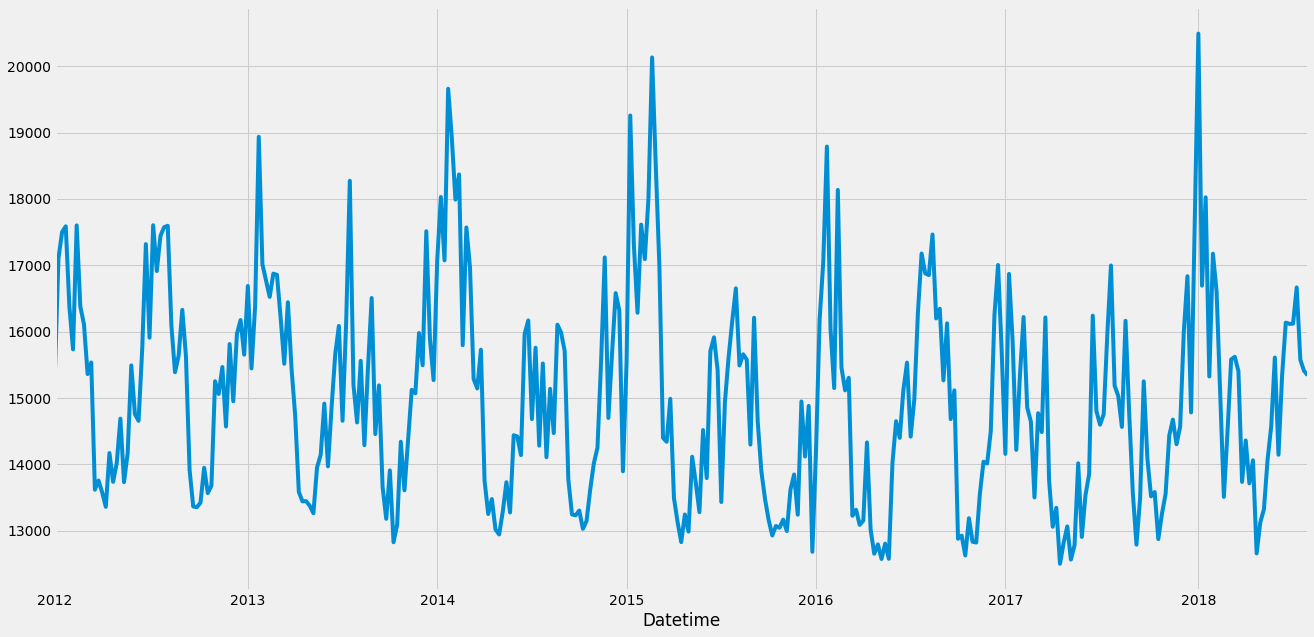

In [23]:
data.plot(figsize=(20, 10))
plt.show()

In [12]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7597.821388200358
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7132.499055224578
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6179.199283347911
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5816.902610136043
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6195.871005071577
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6064.6601291164525
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5657.4891730970685
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5642.207167027354
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7329.432002449664
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7023.350268445236
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6003.54660436471
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5602.1266800422945
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6022.44406194864


/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5863.034507516084
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5569.344062014985
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5528.713605170888
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5812.909989309635
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5612.485814921427
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5873.560672956486
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:5456.232234146833
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:5628.042206004788
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:5613.014961472352
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:5557.475899716858
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:5451.6794051250035
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:5764.477398426672
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:5562.250951799
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:5835.32517762716
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:5406.654094038698
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:5592.595987942614
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:5555.140936925705
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:5508.483968874446
ARIMA(0, 1, 1

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:5629.932103448553
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:5856.804803949179
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:5452.276051910086
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:5629.714715803467
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:5630.237782326257
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:5496.705705572217
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:5448.521266436728
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:5782.469408355293
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:5580.126995733814
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:5832.5707682945385
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:5413.5679169464365
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:5594.648958681076
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:5574.139817261014
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:5485.832312404733
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:5406.52757708369
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:5790.396444824832
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:5589.7884830060175
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:5854.837947075892
ARIMA(1,

In [14]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1537      0.139      1.106      0.269      -0.119       0.426
ma.L1         -0.5136      0.129     -3.989      0.000      -0.766      -0.261
ar.S.L12      -0.2290      0.065     -3.521      0.000      -0.356      -0.102
ma.S.L12      -0.8331      0.042    -19.646      0.000      -0.916      -0.750
sigma2      1.258e+06   9.63e+04     13.071      0.000    1.07e+06    1.45e+06


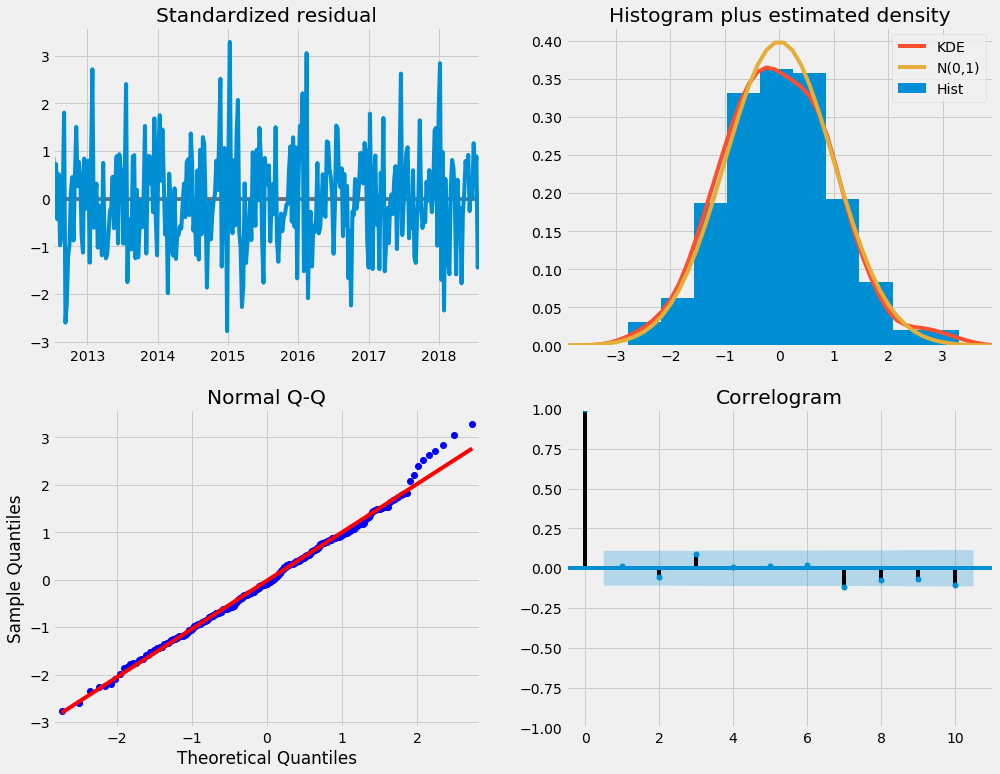

In [15]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-10-01'), dynamic=False)
pred_ci = pred.conf_int()

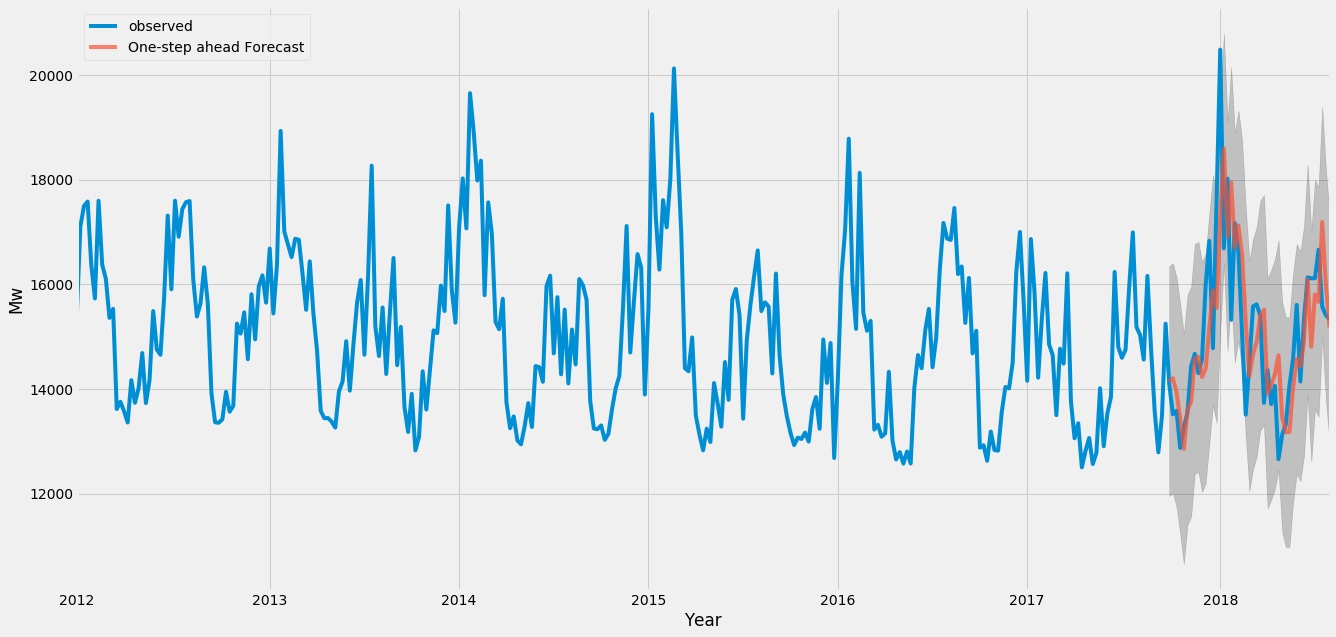

In [22]:
plt.figure(figsize=(20, 10))
ax = data['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Mw')
plt.legend()

plt.show()

# Часть 2. Написать реализацию модели Хольта-Уинтерса (без использования готовых методов из библиотек)

In [4]:
data = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data = data.filter(regex=r'Product|W')

values = data[data['Product_Code'] == 'P1'].filter(regex=r'W').as_matrix()[0]
series = pd.Series(values)

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


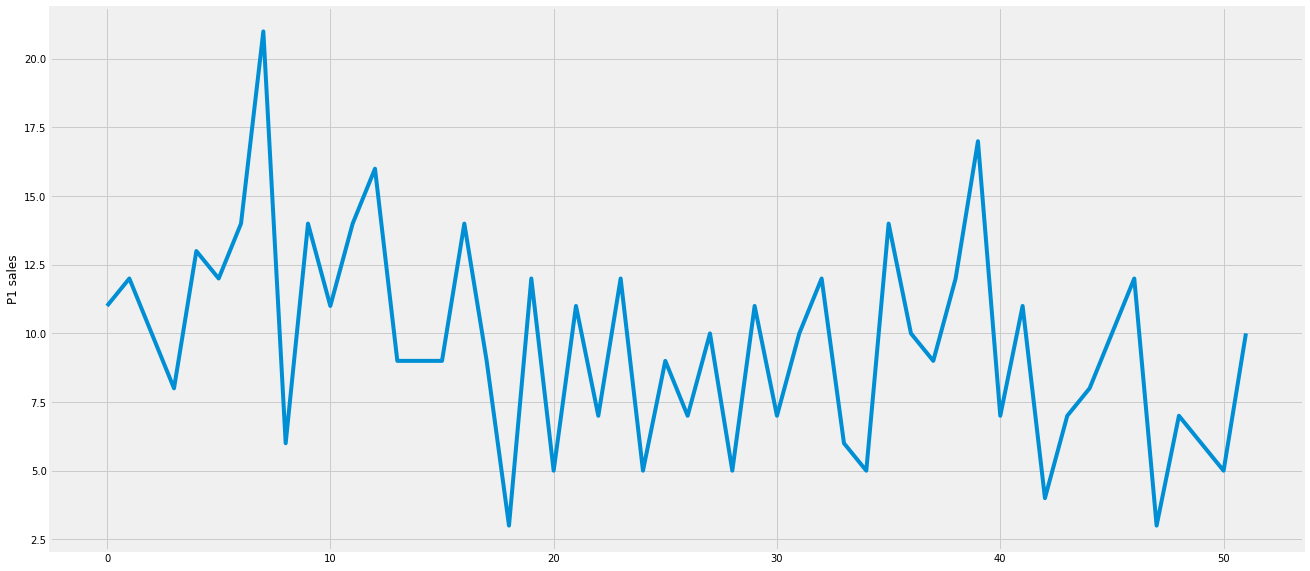

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(values)
plt.ylabel('P1 sales')
plt.show()

In [7]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [8]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [9]:
def HoltWinters(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: 
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): 
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result


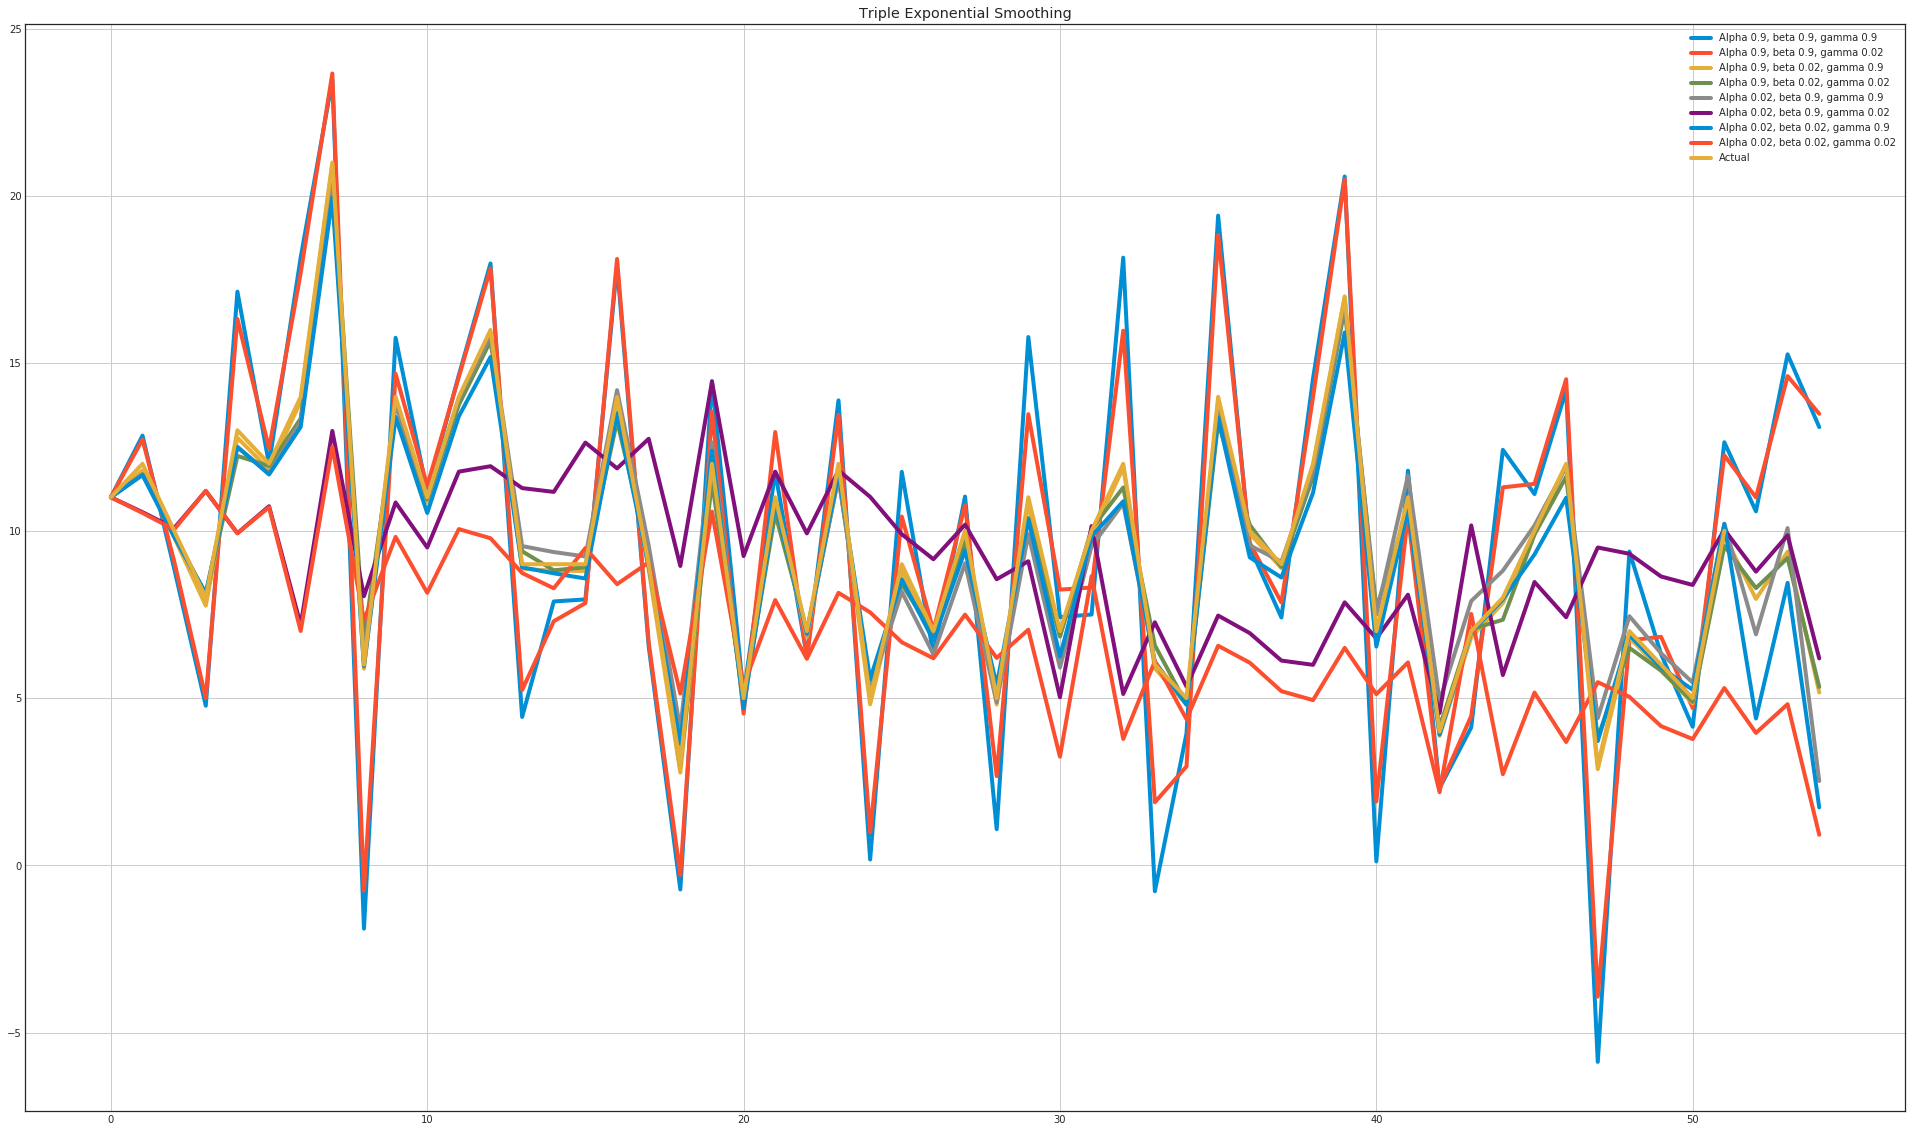

In [11]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(30, 20))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            for gamma in [0.9, 0.02]:
                plt.plot(HoltWinters(series, 12,  alpha, beta, gamma, 3), label="Alpha {}, beta {}, gamma {}".format(alpha, beta, gamma))
    plt.plot(series, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Triple Exponential Smoothing")
    plt.grid(True)

# Часть 3.  Натренировать одну из ML моделей на предсказание значения временного ряда.

In [35]:
data_energy = pd.read_csv('energydata_complete.csv', index_col=0)
data_energy.index = pd.to_datetime(data_energy.index)
data_energy.head(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [46]:
data_energy_oneday = data_energy[data_energy.index < '2016-01-12 17:00:00' ]
data_energy_oneday.shape

(144, 28)

## Energy consumption for one day (2016-01-12)

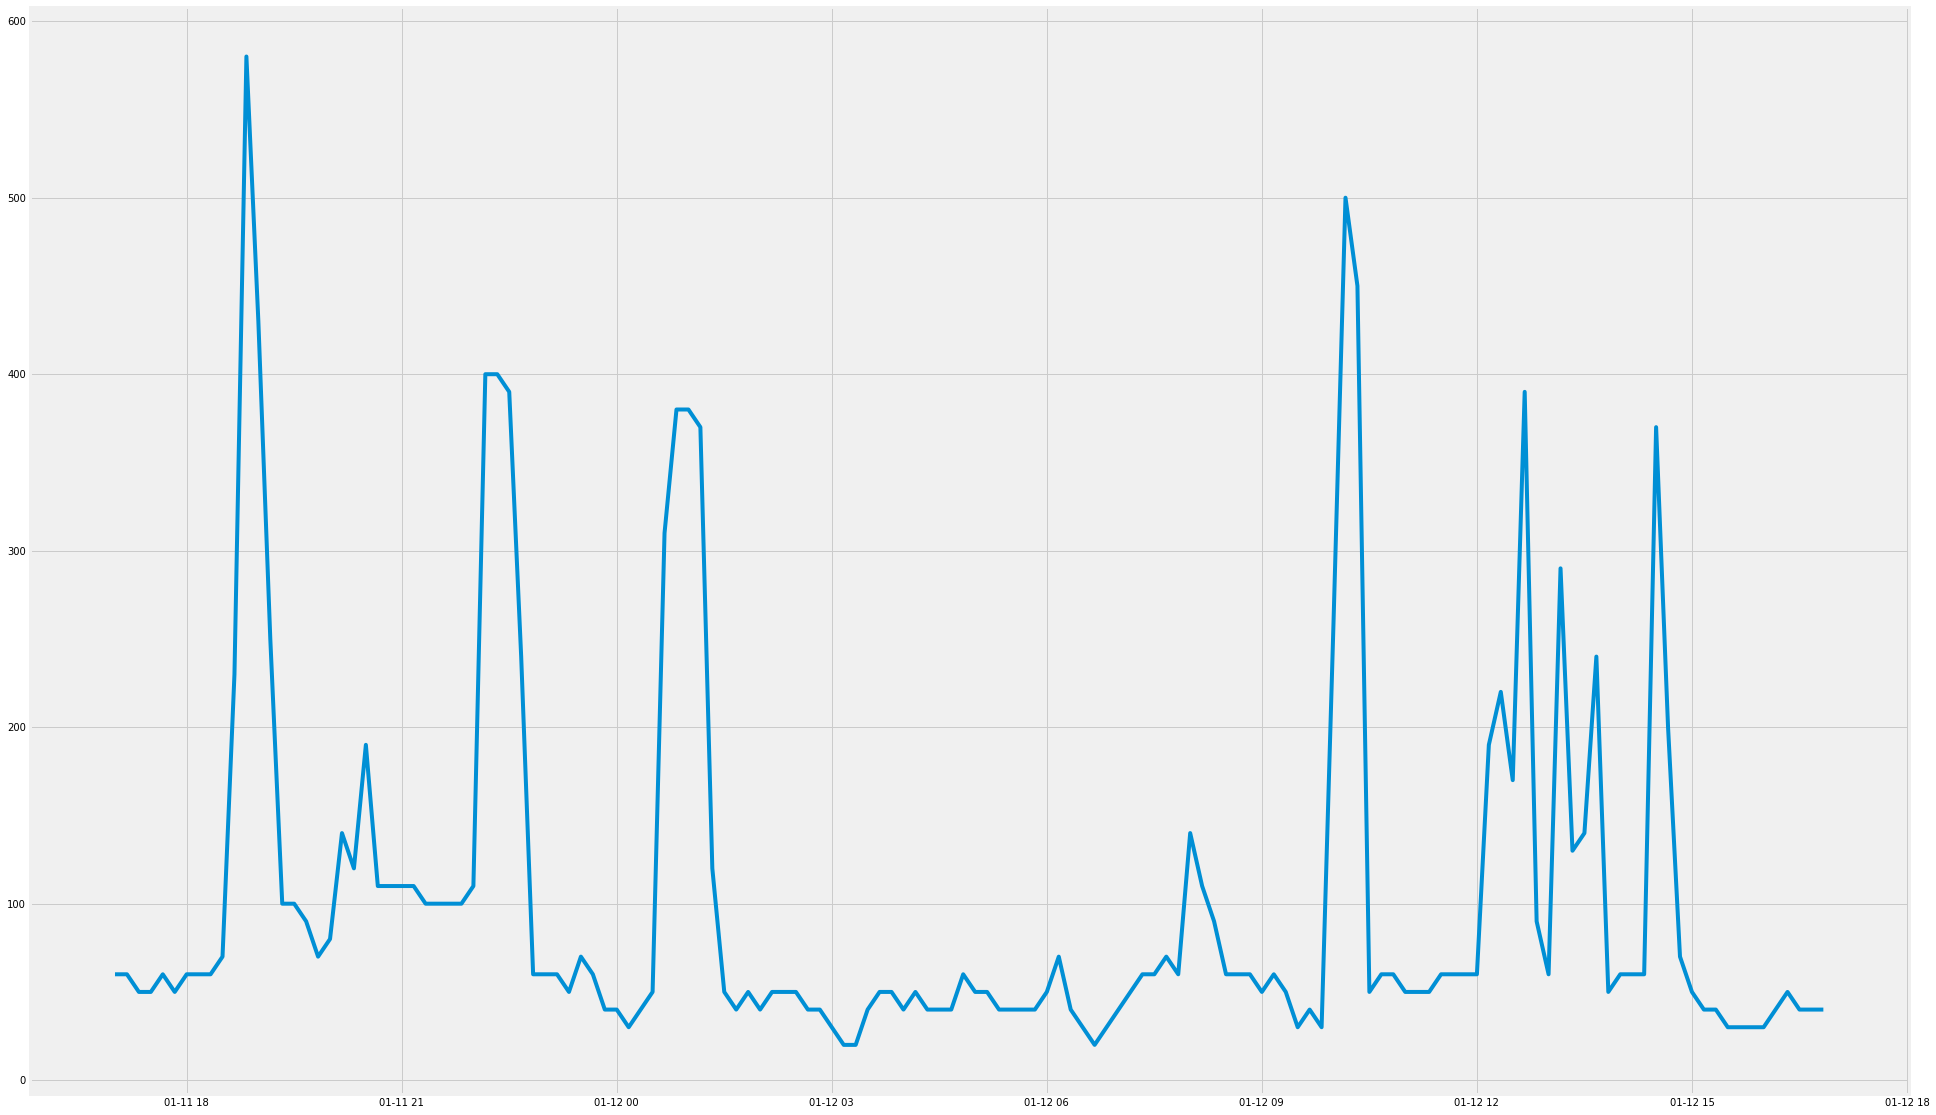

In [49]:
plt.figure(figsize=(30, 20))
plt.plot(data_energy_oneday['Appliances'])

In [51]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [52]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor


## RandomForestRegressor

In [54]:
mean_error = []

for day in pd.date_range(start='2016-05-20', end='2016-05-27'):
    
    train = data_energy[data_energy.index < day]
    val = data_energy[data_energy.index == day]
  
    xtr, xts = train.drop(['Appliances'], axis=1), val.drop(['Appliances'], axis = 1)
    ytr, yts = train['Appliances'].values, val['Appliances'].values

    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmsle(yts, p)
    print('Error %.5f' % error)
    mean_error.append(error)
    
print('Mean Error = %.5f' % np.mean(mean_error))

Error 0.36397
Error 0.05111
Error 0.55407
Error 0.13261
Error 0.15378
Error 0.01520
Error 0.06876
Error 0.07605
Mean Error = 0.17694


## LGBMRegressor

In [56]:
mean_error = []

for day in pd.date_range(start='2016-05-20', end='2016-05-27'):
    
    train = data_energy[data_energy.index < day]
    val = data_energy[data_energy.index == day]
  
    xtr, xts = train.drop(['Appliances'], axis=1), val.drop(['Appliances'], axis = 1)
    ytr, yts = train['Appliances'].values, val['Appliances'].values

    mdl = LGBMRegressor(n_estimators=4000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmsle(yts, p)
    print('Error %.5f' % error)
    mean_error.append(error)
    
print('Mean Error = %.5f' % np.mean(mean_error))

Error 0.30232
Error 0.24952
Error 0.37860
Error 0.12724
Error 0.01547
Error 0.07987
Error 0.05877
Error 0.09520
Mean Error = 0.16337
